<a href="https://colab.research.google.com/github/Kekichka/AI/blob/labs/Task3_basic_ai_ad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
titanic_data = pd.read_csv("titanic.csv")

print(titanic_data.describe())
print(titanic_data.shape)
print(titanic_data.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890

***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [ ]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

Є пропущені значення в трьох атрибутах, найбільше у cabin

***Завдання 3:*** Побудувати матрицю кореляції



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



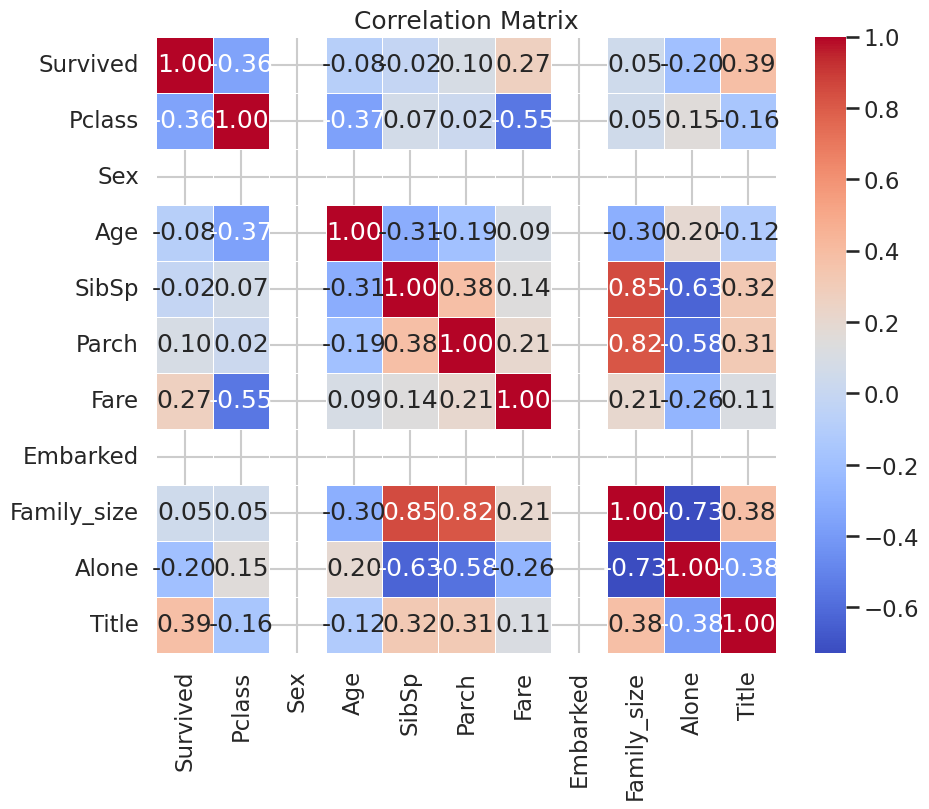

In [34]:
numeric_data = titanic_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Ваші висновки:

Багато де коеф кореляції дуже малий і видно що знаачення не залежать одне від одного. найбільшу кореляцію можна помітити між SibSp і Family_size та між Parch і Family_size. Найменша - Family_size і ALone

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [44]:
def fill_missing_with_median(titanic_data, column_name, group_columns):
    median_values = titanic_data.groupby(group_columns)[column_name].median()

    def fill_missing(row):
        if pd.isna(row[column_name]):
            group = tuple(row[group_columns])
            if group in median_values.index:
                return median_values.loc[group].astype(float)
            else:
                return row[column_name]
        else:
            return row[column_name]

    titanic_data[column_name] = titanic_data.apply(fill_missing, axis=1)
    return titanic_data

print("Before:")
print(titanic_data.isna().sum())

titanic_data_filled = fill_missing_with_median(titanic_data, 'Age', ['Pclass', 'Sex'])

print("After:")
print(titanic_data_filled.isna().sum())

Before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
After:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки:

тепер пропущених значень age немає


***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні.

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків.


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





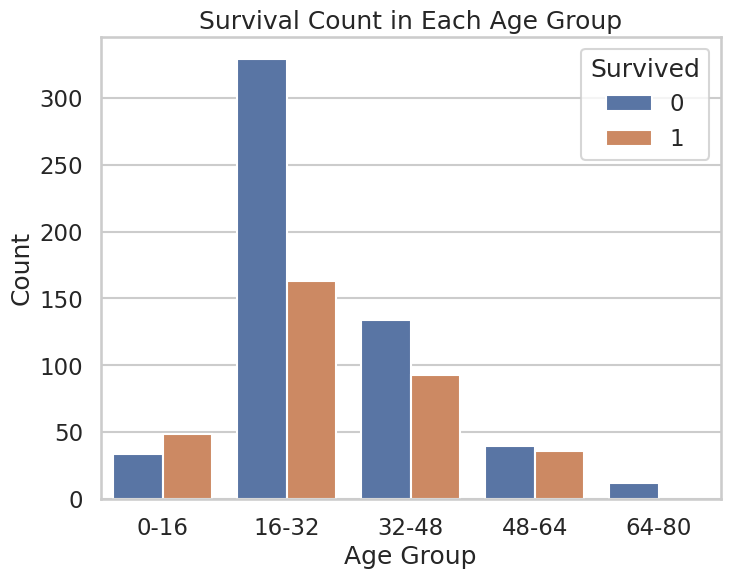

In [ ]:
age_bins = [0, 16, 32, 48, 64, 80]
age_labels = [0, 1, 2, 3, 4]
titanic_data['Age_bin'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_data, x='Age_bin', hue='Survived')
plt.title('Survival Count in Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(ticks=range(5), labels=['0-16', '16-32', '32-48', '48-64', '64-80'])
plt.show()

Ваші висновки:

Найбільша смертність і найбільше виживших у вікової групи 16-32, найменша - 64-80

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали```
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [ ]:
titanic_data['fare_binned'] = pd.qcut(titanic_data['Fare'], q=4, labels=False)
survival_rate_by_fare = titanic_data.groupby('fare_binned')['Survived'].mean()
chi2, p_val = stats.chisquare(survival_rate_by_fare)

if p_val < 0.05:
    print("Significant differences")
else:
    print("No differences")

No differences


Ваші висновки:

Різниці між квартилями немає, або не є значущою



***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

In [ ]:
titanic_data['Family_size'] = titanic_data['Parch'] + titanic_data['SibSp']
titanic_data['Alone'] = (titanic_data['Family_size'] == 0).astype(int)

print(titanic_data[['Family_size', 'Alone']].describe())
print(titanic_data.groupby('Alone')['Survived'].mean())
print(titanic_data.groupby('Family_size')['Survived'].mean())

       Family_size       Alone
count   891.000000  891.000000
mean      0.904602    0.602694
std       1.613459    0.489615
min       0.000000    0.000000
25%       0.000000    0.000000
50%       0.000000    1.000000
75%       1.000000    1.000000
max      10.000000    1.000000
Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64
Family_size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


Ваші висновки:

Пасажири з сім'єю мали більший рівень виживання (найбільший відсоток у сімей з 3 членами родинами) проте пасажири з великою кількостю родичів (4 і більше) мали менший шанс

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [15]:
titanic_data.drop(columns=['PassengerId', 'Ticket', 'Cabin'], inplace=True)
titanic_data.dropna(subset=['Embarked'], inplace=True)

print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
 9   Title     891 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB
None


Ваші висновки:

Айді пасажира, номер квитка і кабіни не мають ніякого значення для аналізів шансів на виживання

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [34]:
titanic_data['Title'] = titanic_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

label_encoder = LabelEncoder()

titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'].astype(str))
titanic_data['Title'] = label_encoder.fit_transform(titanic_data['Title'])

titanic_data.to_csv("titanic_encoded.csv", index=False)

titanic_encoded = pd.read_csv("titanic_encoded.csv")

print(titanic_encoded[['Sex', 'Embarked', 'Title']].head())
print(titanic_encoded[['Sex', 'Embarked', 'Title']].nunique())

   Sex  Embarked  Title
0    1         2     12
1    0         0     13
2    0         2      9
3    0         2     13
4    1         2     12
Sex          2
Embarked     4
Title       17
dtype: int64


Ваші висновки:

змінні перетворено на числові значення, де
Sex 1 - male, 0 - female, embarked 0-C, 1-Q, 2-S

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



In [37]:
cat_columns = titanic_data.select_dtypes(include=['category']).columns
print(cat_columns)

Index([], dtype='object')


Ваші висновки:

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

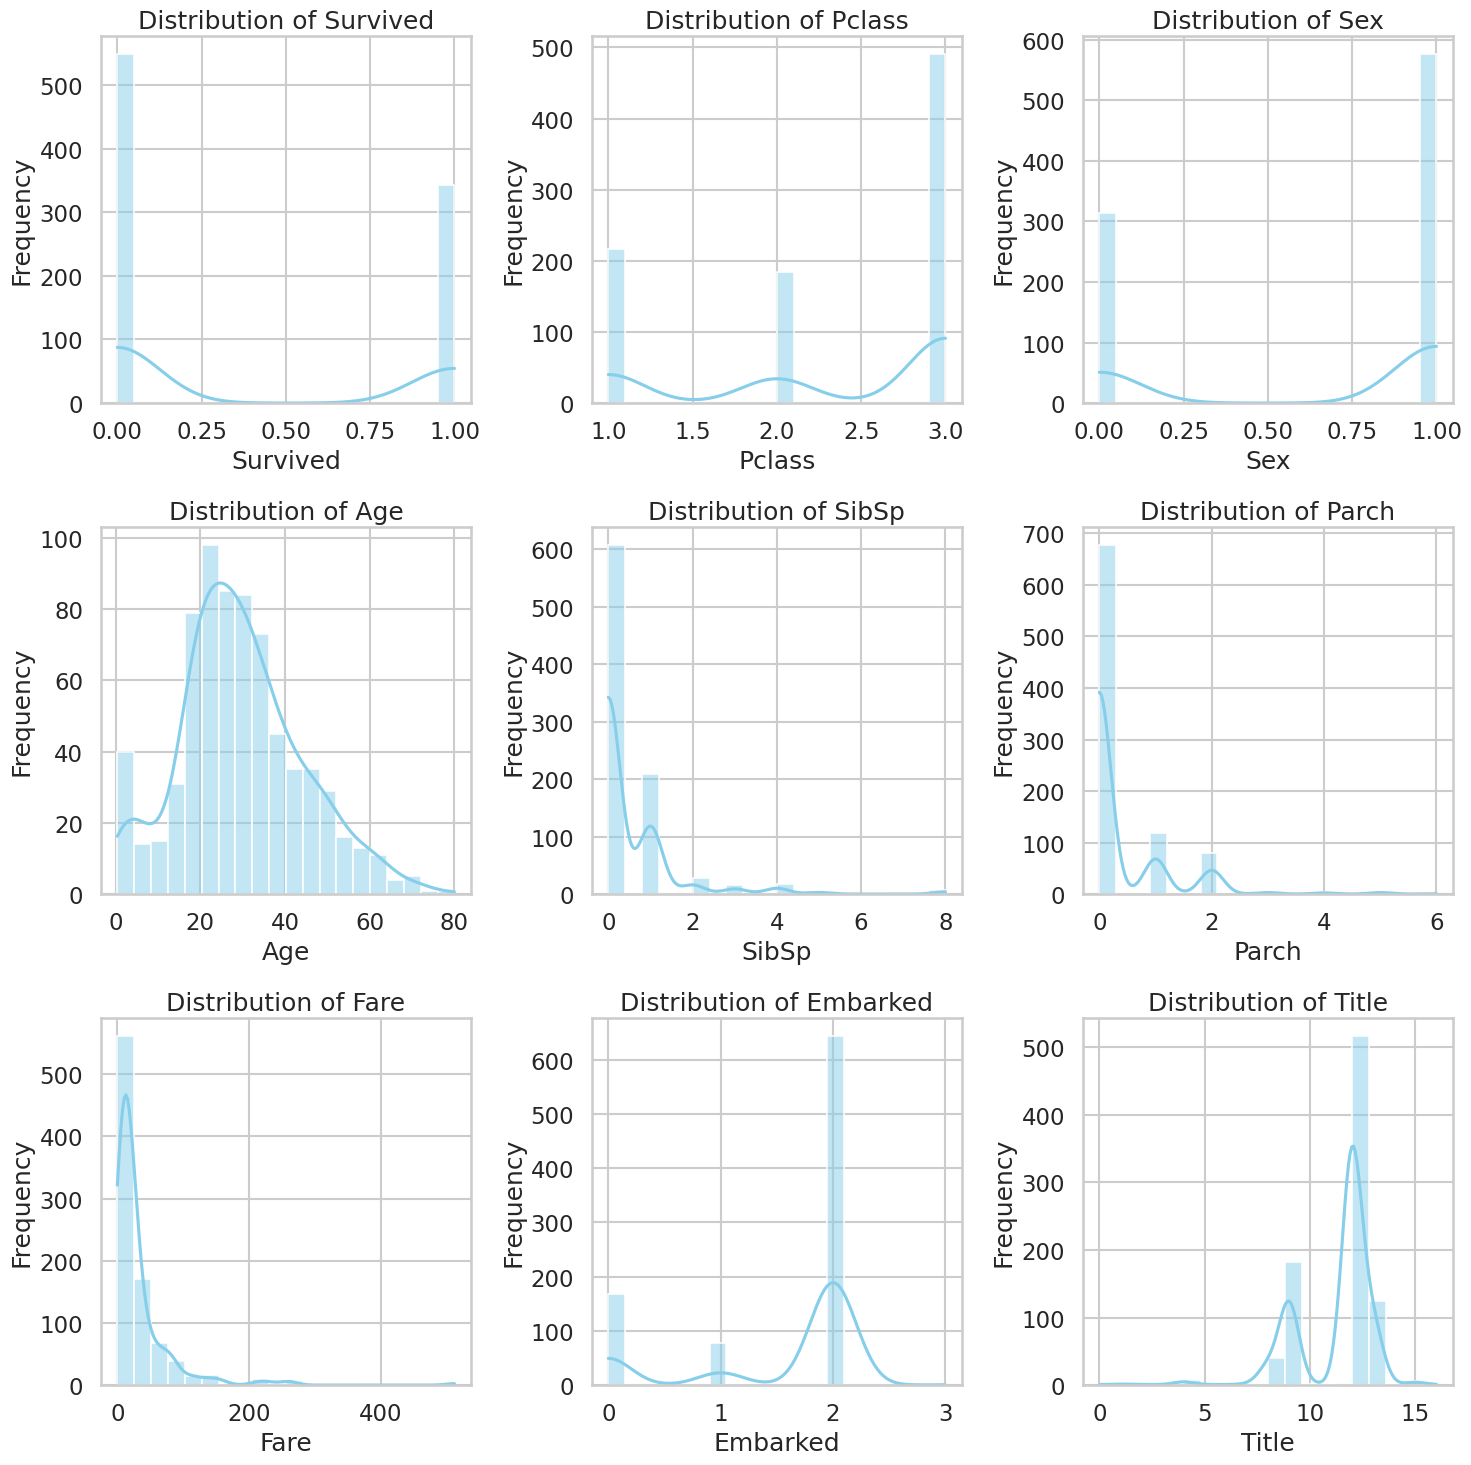

In [16]:
num_columns = titanic_data.select_dtypes(include=['float64', 'int64']).columns

n_cols = 3
n_rows = -(-len(num_columns) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for ax, col in zip(axes.flat, num_columns):
    sns.histplot(titanic_data[col], kde=True, ax=ax, color='skyblue', bins=20)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

for ax in axes.flat[len(num_columns):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

Ваші висновки:



1.   більше пасжирів померло
2.   більшість пасажирів подорожували в 3-му класі
3.   на борту більшість - чоловіки
4.   найбільше пасажирів віком близько 20-30 років
5.   більшість пасажирів подорожували самостійно, але є невеликі групи з 1-2 родичами
6.   більшість пасажирів подорожували самостійно, але є невеликі групи з 1-2 родичами
7.   більшість заплатили низьку ціну за квиток, але є і дуже високі значення
8.   найбільше зайшло на борт у місті S
9.   title показує різні соц статуси пасажирів



##Співвіднонешшя між всіма числовими змінними
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

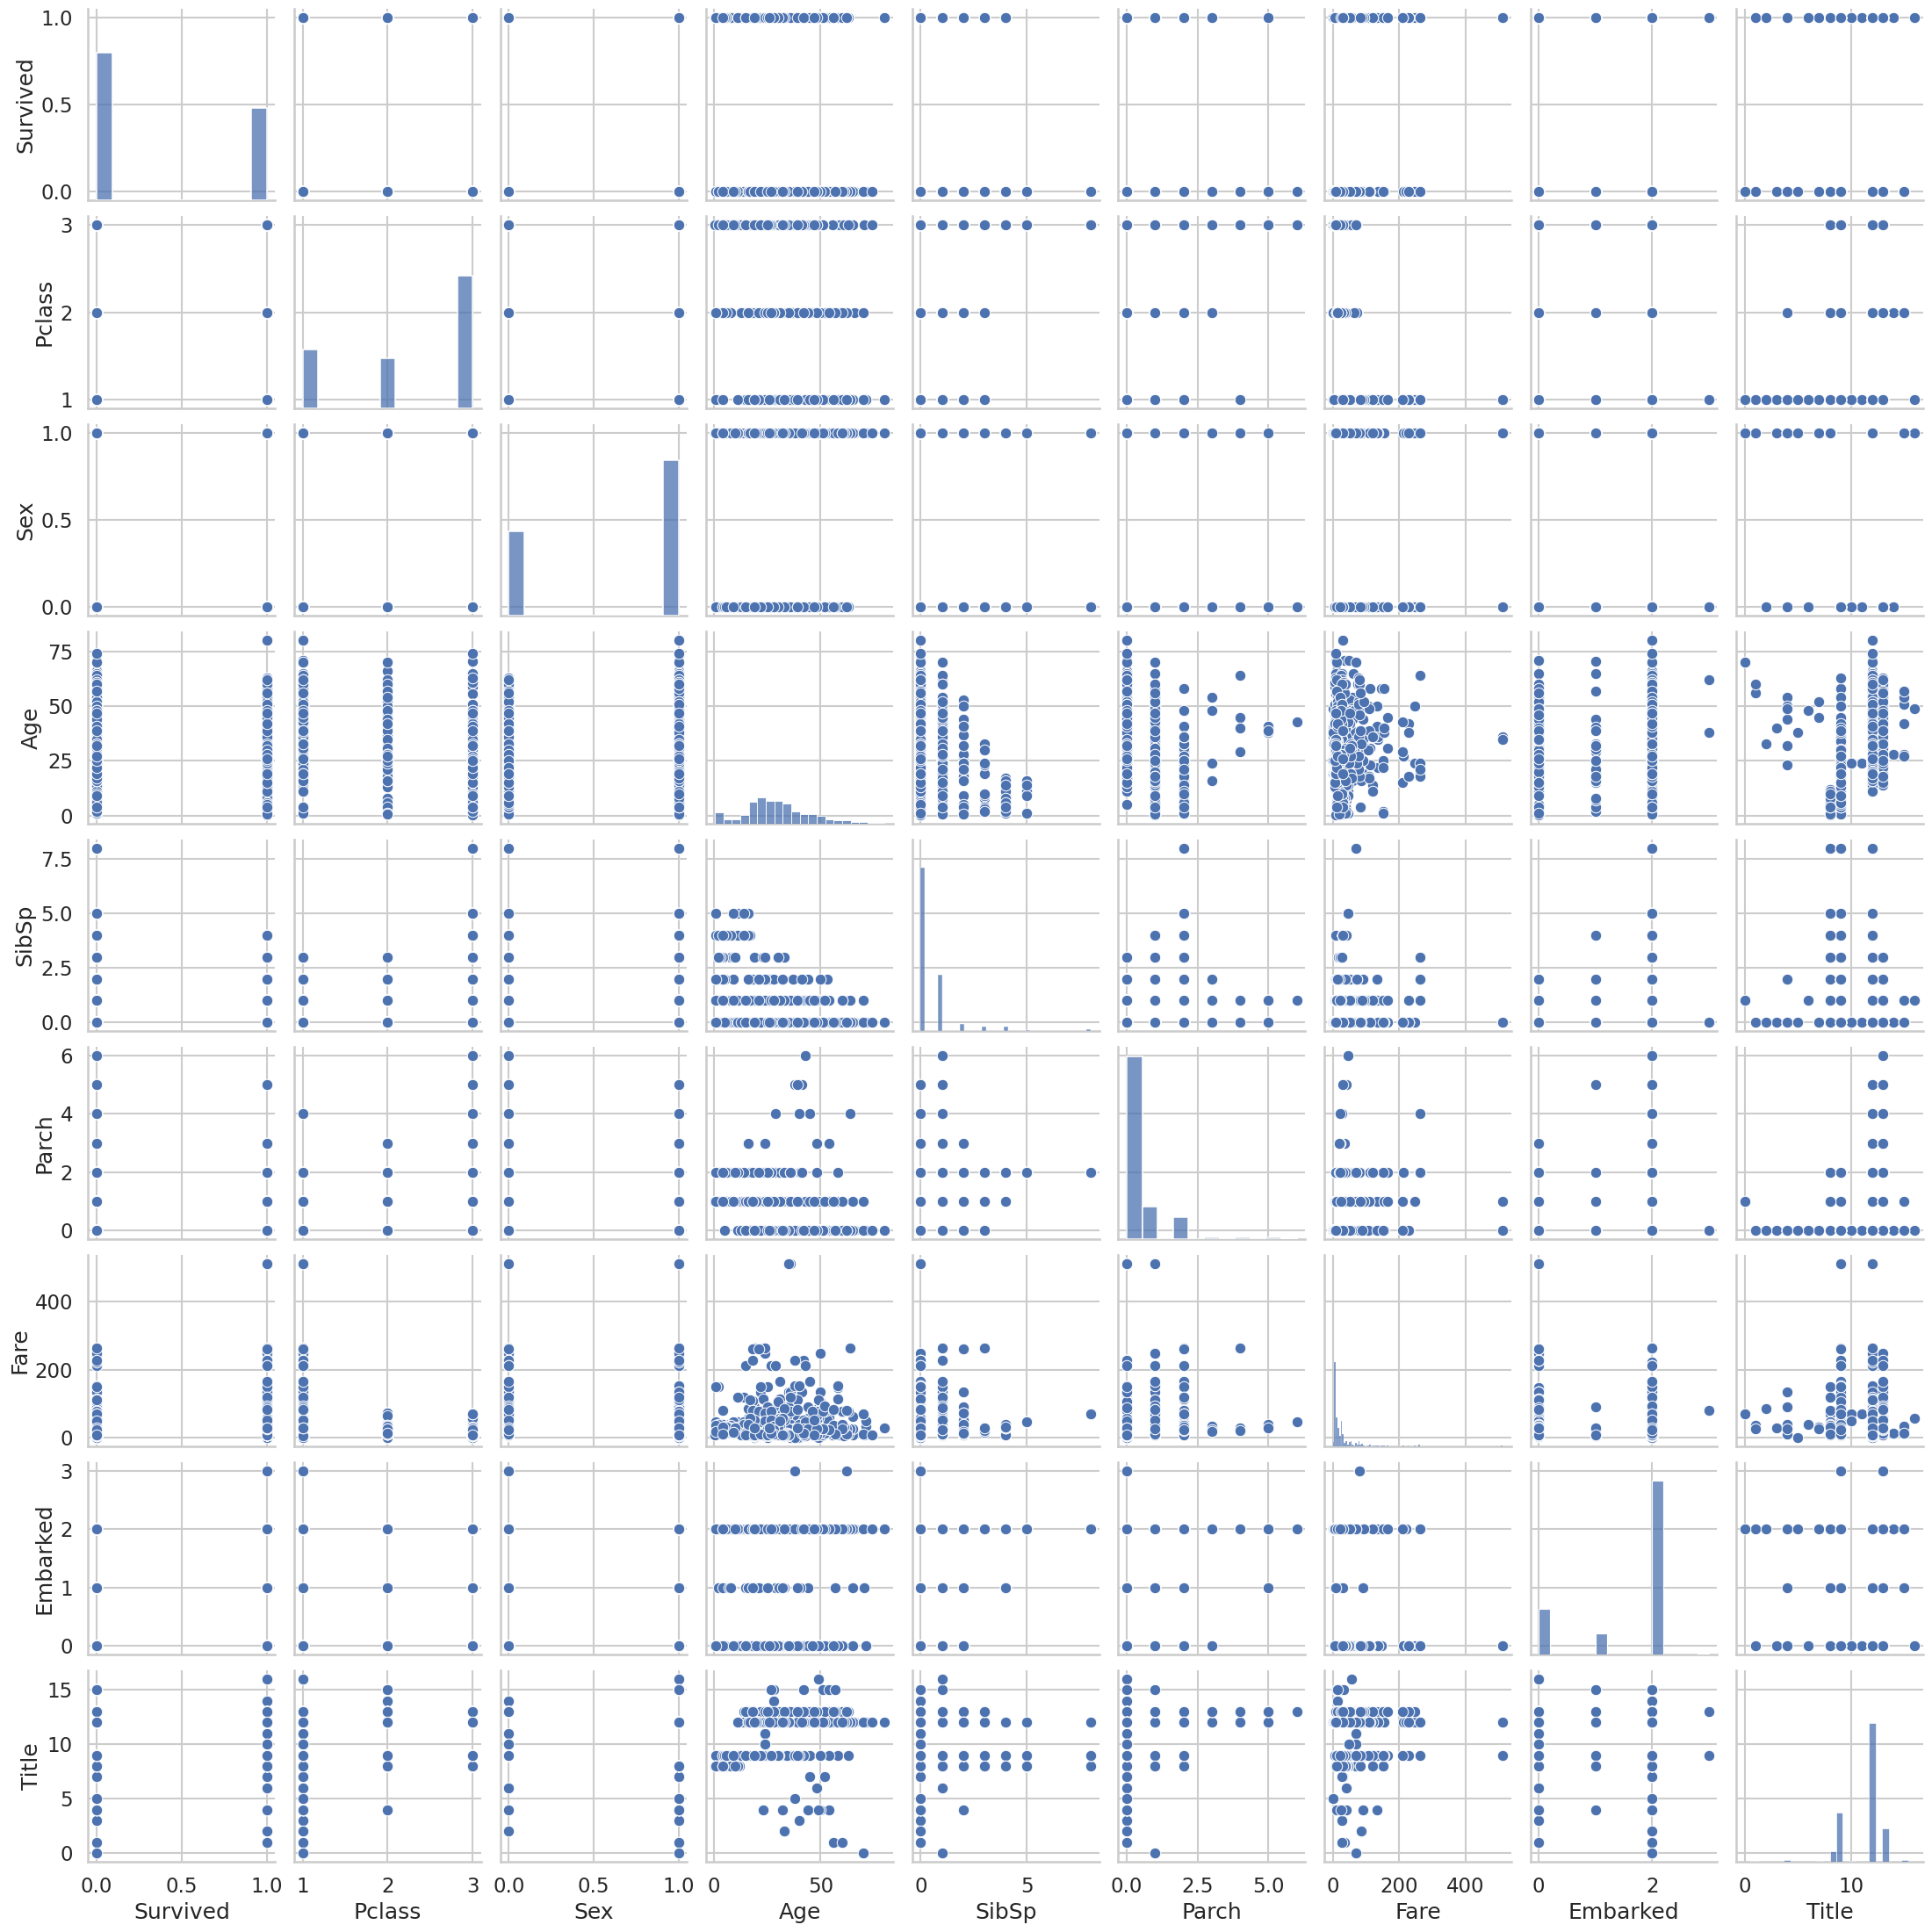

In [20]:
sns.pairplot(titanic_data[num_columns])
plt.show()

Ваші висновки:

1. **Survived**:  
   Pclass: Пасажири з 1-го класу мали вищі шанси на виживання, у 3-му класі переважали загиблі.  
   Sex: Більшість виживших – жінки, тоді як більшість загиблих – чоловіки.  
   Fare: Ті, хто заплатив більше, мали вищі шанси вижити ( корелює з класом).  
   Age: Виживання зменшується з віком, хоча є винятки серед дітей.
2. **Pclass**:  
   Корелює з Fare: пасажири 1-го класу платили більше.  
   Корелює з Age: пасажири 1-го класу загалом були старшими за пасажирів 3-го класу.  
3. **Fare vs. Age**:  
   Багато молодих з низькою вартістю квитка
4. **SibSp / Parch vs. Survived**:  
   Пасажири з більшими родинами (типу 4+) і ті що були самі виживали рідше.
5. Пасажири, які сідали в місті C, часто мали дорожчі квитки і більшу ймовірність вижити.  
6. Вищі титули ("Master", "Miss") частіше корелюють із виживанням.

Можна використати співвідношення Pclass, Sex, Fare, Age, Embarked, SibSp, Parch для прогнозування виживання/визначння груп, які були в більшій небезпеці.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.